# W207 Applied Machine Learning - Summer 2020

### Final Project: HOME PRICE PREDICTION, IMPROVED MODEL

### Student Name: Edward Tong, Praveen Kasireddy, Shishir Agarwal, Josh Jonte

### Date: 07/25/2020

# Problem Statement  

- To predict the final residential home price in Ames, Iowa with datasets from Kaggle, https://www.kaggle.com/c/house-prices-advanced-regression-techniques. 

# Baseline Model   

- Our team initially has derived two baseline models with linear regression algorithm for sale price prediction. Both model with dependent variable, SalePrice and different independent variable of GrLivArea and LotArea which are related to the house areas. 

- The prediction also carried out with independent variables trasnformation into log for exploration.  

- Baseline models' prediction accuracy, R^2 obtained for GrLivArea , logGrLivArea, LotArea and LogLotArea are 0.479, 0.474, 0.083 and 0.170 respectively.

- Our team performed analysis further in order to improve the model with higher accuracy.  

# Model Improvement Approach

Our team carried out the following approach for finding the model with improved accuracy in compare with baseline model.

- EDA : Identifying and correcting mistakes or errors in the data.   
- Feature Selection: Identifying those input variables that are most relevant to the task.  
- Data Transforms: Changing the scale or distribution of variables.  
- Feature Engineering: Deriving new variables from available data.  
- Evaluate different models to find the optimal model , that is maximum prediction accuracy, R^2. 

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import sklearn.utils
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# SK-learn libraries for evaluation.
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#libraries to print decissiontree graph
# import graphviz
# from IPython.core.display import Image, display
# import pydot

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

/Users/josh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/josh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/josh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/josh/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [2]:
if keras.__version__ != '2.3.0-tf':
    print(f'We are assuming Keras version 2.3 and you are running {keras.__version__}.')

We are assuming Keras version 2.3 and you are running 2.2.4-tf.


# Exploratory Data Analysis

In [3]:
# Load the training data set which was download from  https://www.kaggle.com/c/house-prices-advanced-regression-techniques
raw_data = pd.read_csv('train.csv', sep=',')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print(f'\nThe shape of the raw data set is: {raw_data.shape}')


The shape of the raw data set is: (1460, 81)


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- From the information above, the data set contains two types of data , numerical and categorical data, and there are missing values in some of the features.

- We will perform data cleaning and seperate the numerical and categorical data as the features selection methods for these types of data are different.

### Data Cleaning 
- We reviewed columns that have NULL or Missing value
- We remove the columns that have more than 10 missing values
- We impute missing value for columns that have less than 10 missing values

In [7]:
raw_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
# Remove columns with more than 10 missing values
raw_data = raw_data[raw_data.columns[np.array(raw_data.isnull().sum() <= 10)]]

In [9]:
# Impute columns with less than 10 missing values
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
raw_data.MasVnrArea = imp_num.fit_transform(np.array(raw_data.MasVnrArea).reshape(-1,1))
raw_data.MasVnrType = imp_cat.fit_transform(np.array(raw_data.MasVnrType).reshape(-1,1))
raw_data.Electrical = imp_cat.fit_transform(np.array(raw_data.Electrical).reshape(-1,1))

In [10]:
print(f'\nThe shape of the data set to be used for anlaysis is: {raw_data.shape}')


The shape of the data set to be used for anlaysis is: (1460, 65)


### Features Engineering and Selection

#### Target Feature Analysis

The value we are trying to predict is the sales price of the home, which is captured in the `SalePrice` feature.  

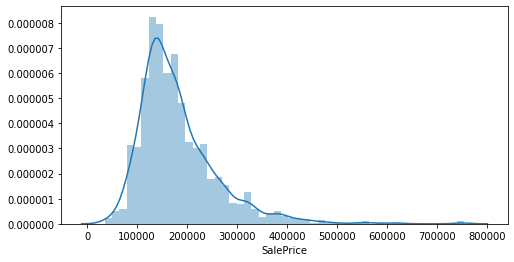

In [11]:
plt.figure(figsize=(8,4))
sns.distplot(raw_data['SalePrice'])

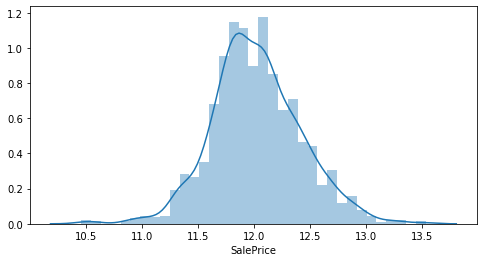

In [12]:
# Transform SalePrice which looks positive skewed into Log form for normal distribution

plt.figure(figsize=(8,4))
sns.distplot(np.log(raw_data['SalePrice']))

Feature Engineering

- We created a new numerical feature "HseAge" which is based on two numerical features  'YrSold' and 'YearBuilt'. 
- We also added 1 to ensure the minimum value of 'HseAge' is 1 when log transformation being executed would not induce an infinity value 

In [13]:
raw_data['HseAge'] = raw_data['YrSold'] - raw_data['YearBuilt'] + 1
print(f'\nThe shape of the data set to be used for anlaysis is: {raw_data.shape}')


The shape of the data set to be used for anlaysis is: (1460, 66)


<b>
We dropped number of features with reasons below beacuse they are not relevant:</b>   

- ID is an arbitrary id assigned to each record and is not relevant to SalePrice
- YearBuilt because it is included in 'HseAge'
- YrSold because it is included in 'HseAge'
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF is included in 'TotalBsmtSF'
- 1stFlrSF, 2ndFlrSF, LowQualFinSF is included in 'GrLivArea'

In [14]:
columns_drop = ['Id', 'YearBuilt', 'YrSold', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']
raw_data = raw_data.drop(columns=columns_drop)
print(f'\nThe shape of the data set to be used for anlaysis is: {raw_data.shape}')


The shape of the data set to be used for anlaysis is: (1460, 57)


#### Split the dataset into numerical and categorical features dataframes 
- We select features that numerical and not ordinal

In [15]:
# Create numerical features dataframe 

columns_num = ['LotArea', 'TotalBsmtSF', 'GrLivArea',  'GarageArea', 
               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
               'PoolArea', 'MiscVal', 'HseAge', 'MasVnrArea', 'SalePrice']
raw_data_num = raw_data[columns_num]
print(f'The shape of the data set to be used for anlaysis is: {raw_data_num.shape}')

The shape of the data set to be used for anlaysis is: (1460, 14)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7b12d31d0>,
      dtype=object)

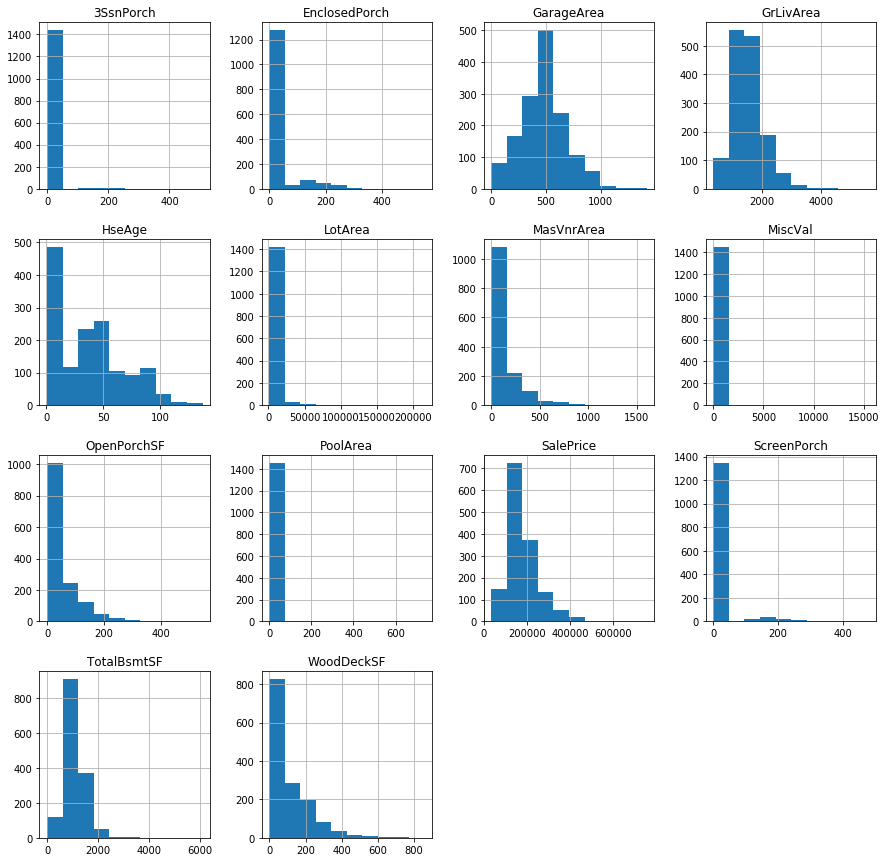

In [16]:
raw_data_num.hist(figsize=(15,15))

In [17]:
# Create categorical features dataframe

columns_cat = ['MSSubClass', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'PavedDrive', 'MoSold', 'SaleType','SaleCondition', 'OverallQual', 'OverallCond']
raw_data_cat = raw_data[columns_cat]
print(f'\nThe shape of the data set to be used for anlaysis is: {raw_data_cat.shape}')


The shape of the data set to be used for anlaysis is: (1460, 43)


#### Numerical Features Selection with Filter Method (Pearson Coefficient)

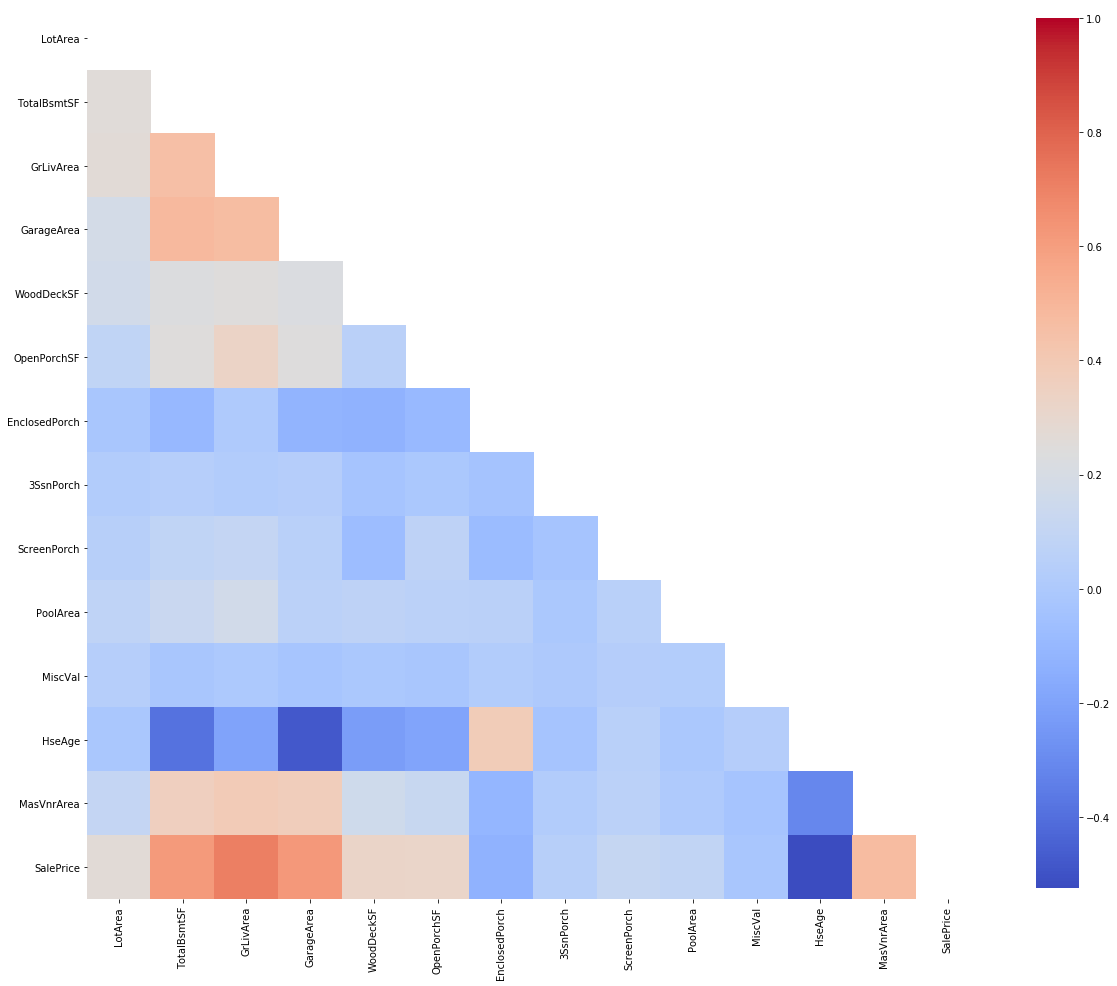

In [18]:
# Show the heatmaps 

correlations = raw_data_num.corr()
plt.rcParams['figure.figsize'] = (20, 20)

# Mask upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, square=True, mask=mask, cmap='coolwarm', cbar_kws={"shrink": 0.8})

In [19]:
# Pearson Coefficient 
corr_num_data = raw_data_num.select_dtypes(include=[np.number]).corr()
cor_target = abs(corr_num_data["SalePrice"])

#Selecting highly correlated features ( > 0.5 and < 1.0) with SalePrice from numerical data
num_features = cor_target[(cor_target > 0.5) & (cor_target < 1)]
print(f'\nFollowing are numerical features with correlation coefficient > 0.5 and < 1.0: \n', num_features.sort_values(ascending=False))


Following are numerical features with correlation coefficient > 0.5 and < 1.0: 
 GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
HseAge         0.523350
Name: SalePrice, dtype: float64


In [20]:
# Standardize features by removing the mean and scaling to unit variance

columns_num = ['GarageArea', 'TotalBsmtSF', 'HseAge']
raw_data_num = raw_data[columns_num]
ss = StandardScaler(copy=True, with_mean=True, with_std=True)
raw_data_num_ss = pd.DataFrame(ss.fit_transform(raw_data_num), columns=columns_num)
raw_data_num_ss.shape

(1460, 3)

In [21]:
# Based on findings from our baseline model , we transformed feature 'GrLivArea' into log form for normal distribution 
columns_num_log = ['GrLivArea']
raw_data_num_log = np.log(raw_data[columns_num_log])
raw_data_num_log.shape

(1460, 1)

In [22]:
# Combine the standardize and transformed features into a dataframe 
raw_data_num_combo = pd.concat([raw_data_num_ss, raw_data_num_log], axis=1)
raw_data_num_combo.shape
print(f'\nThe shape of the standardize and transformed features data set is: {raw_data_num_combo.shape}')


The shape of the standardize and transformed features data set is: (1460, 4)


In [23]:
# We based on our knowledge and selected two categorical features 'Neighborhood' 
# and 'SaleCondition' which we believe they have linear relationship with target feature, SalePrice. 

columns_cat = ['Neighborhood', 'SaleCondition']
raw_data_cat = raw_data[columns_cat]

# Convert the Categorical features into Numerical features by OneHotEncode,and then combine these
# with the original numerical features 

oh = OneHotEncoder()
raw_data_cat_oh = pd.DataFrame(oh.fit_transform(raw_data_cat).toarray(),columns=oh.get_feature_names())

print(f'\nThe shape of the converted categorical features data set is: {raw_data_cat_oh.shape}')


The shape of the converted categorical features data set is: (1460, 31)


In [24]:
# Combine the numerical and converted categorical features into feature set, 'features' for our modeling: 
# Model 1 - Linear Regression and Model 4 Neural Network 

features = pd.concat([raw_data_num_combo, raw_data_cat_oh], axis=1)
features.shape
print(f'\nThe shape of the combined data set ( standardize , transformed and converted categorical features) is: {features.shape}')


The shape of the combined data set ( standardize , transformed and converted categorical features) is: (1460, 35)


In [25]:
# show the selected features columns 
print(f'\nThe combined features columns are :')
features.columns


The combined features columns are :


Index(['GarageArea', 'TotalBsmtSF', 'HseAge', 'GrLivArea', 'x0_Blmngtn',
       'x0_Blueste', 'x0_BrDale', 'x0_BrkSide', 'x0_ClearCr', 'x0_CollgCr',
       'x0_Crawfor', 'x0_Edwards', 'x0_Gilbert', 'x0_IDOTRR', 'x0_MeadowV',
       'x0_Mitchel', 'x0_NAmes', 'x0_NPkVill', 'x0_NWAmes', 'x0_NoRidge',
       'x0_NridgHt', 'x0_OldTown', 'x0_SWISU', 'x0_Sawyer', 'x0_SawyerW',
       'x0_Somerst', 'x0_StoneBr', 'x0_Timber', 'x0_Veenker', 'x1_Abnorml',
       'x1_AdjLand', 'x1_Alloca', 'x1_Family', 'x1_Normal', 'x1_Partial'],
      dtype='object')

# Predictive Modeling

## Model 1a - Linear Regression 

#### Split Data set into training, development and testing sets 

In [26]:
# Split the dataset into train, dev and test data for models fit and evaluation

X = np.array(features)
Y = np.array(np.log(raw_data['SalePrice']))

np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1200:], Y[1200:]
dev_data, dev_labels = X[1000:1200], Y[1000:1200]
train_data, train_labels = X[:1000], Y[:1000]

print('train_data shape: ', train_data.shape)
print('dev_data shape:', dev_data.shape)
print('test_data shape:', test_data.shape )

data shape:  (1460, 35)
label shape: (1460,)
train_data shape:  (1000, 35)
dev_data shape: (200, 35)
test_data shape: (260, 35)


##### Model Fit and Evaluation   

In [27]:
lr_model = LinearRegression()
# Fit on Train Data
lr_model.fit(train_data, train_labels)
# Predict and Score on Train Data
preds = lr_model.predict(train_data)
print("R-square, Training :{:.3f}".format(lr_model.score(train_data, train_labels)))
print("Mean Squared Error, Training :{:.3f}".format(metrics.mean_squared_error(train_labels,preds)))

R-square, Training :0.826
Mean Squared Error, Training :0.029


In [28]:
# Predict and Score on Dev Data
preds = lr_model.predict(dev_data)
print("R-square, Development:{:.3f}".format(lr_model.score(dev_data, dev_labels)))
print("Mean Squared Error, Development :{:.3f}".format(metrics.mean_squared_error(dev_labels,preds)))

R-square, Development:0.817
Mean Squared Error, Development :0.029


## Model 1b - Linear Regression with Regularization (Lasso and Ridge)

In [29]:
def run_model_1b(models, data, iterations = 50):
    results = {}
    for i in models:
        r2_train = []
        r2_dev = []
        for j in range(iterations):
            r2_dev.append(metrics.r2_score(dev_labels,
                                            models[i].fit(train_data, 
                                                         train_labels).predict(dev_data)))
            r2_train.append(metrics.r2_score(train_labels, 
                                             models[i].fit(train_data, 
                                                         train_labels).predict(train_data)))
        results[i] = [np.mean(r2_train), np.mean(r2_dev)]
    return pd.DataFrame(results, index = ["R-square, Training","R-square, Development"])

In [30]:
lasso_params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1, 10]}
ridge_params = {'alpha':[0.1, 1]}

models = {'Lasso': GridSearchCV(Lasso(), 
                   param_grid=lasso_params).fit(train_data, 
                   train_labels).best_estimator_,
           'Ridge': GridSearchCV(Ridge(), 
                    param_grid=ridge_params).fit(train_data, 
                    train_labels).best_estimator_,}

In [31]:
run_model_1b(models, train_data)

,Lasso,Ridge
"R-square, Training",0.818924,0.825812
"R-square, Development",0.817351,0.818906


Model 1a R-square obtained for linear regression with training and development data set are 0.826 and 0.817 respectively.  
Model 1b R-square obtained for Lasso is 0.826 and 0.818 for training and development data set respectively and for Ridge , R-square is 0.826 and 0.819 for training and development dataset respectively

## Model 2 - DecissionTree Regression

DecissionTreeRegressor is an intuitive model that uses the numerical data to help prediction. 


 No. of features 35

Feature importances: [0.02779128 0.14747805 0.46377034 0.31311116 0.         0.
 0.         0.0006939  0.00283425 0.         0.00920876 0.00143893
 0.         0.00324829 0.         0.00051309 0.         0.
 0.00172811 0.         0.00346977 0.01421979 0.         0.
 0.         0.00059696 0.00139211 0.         0.00148503 0.0021382
 0.         0.         0.         0.00488199 0.        ]

R-square, Training : 0.846136813706336
R-square, Development: 0.7907173321777429
Mean Squared Error - Training: 0.025495342476460722
Mean Squared Error - Development: 0.033470026021104854


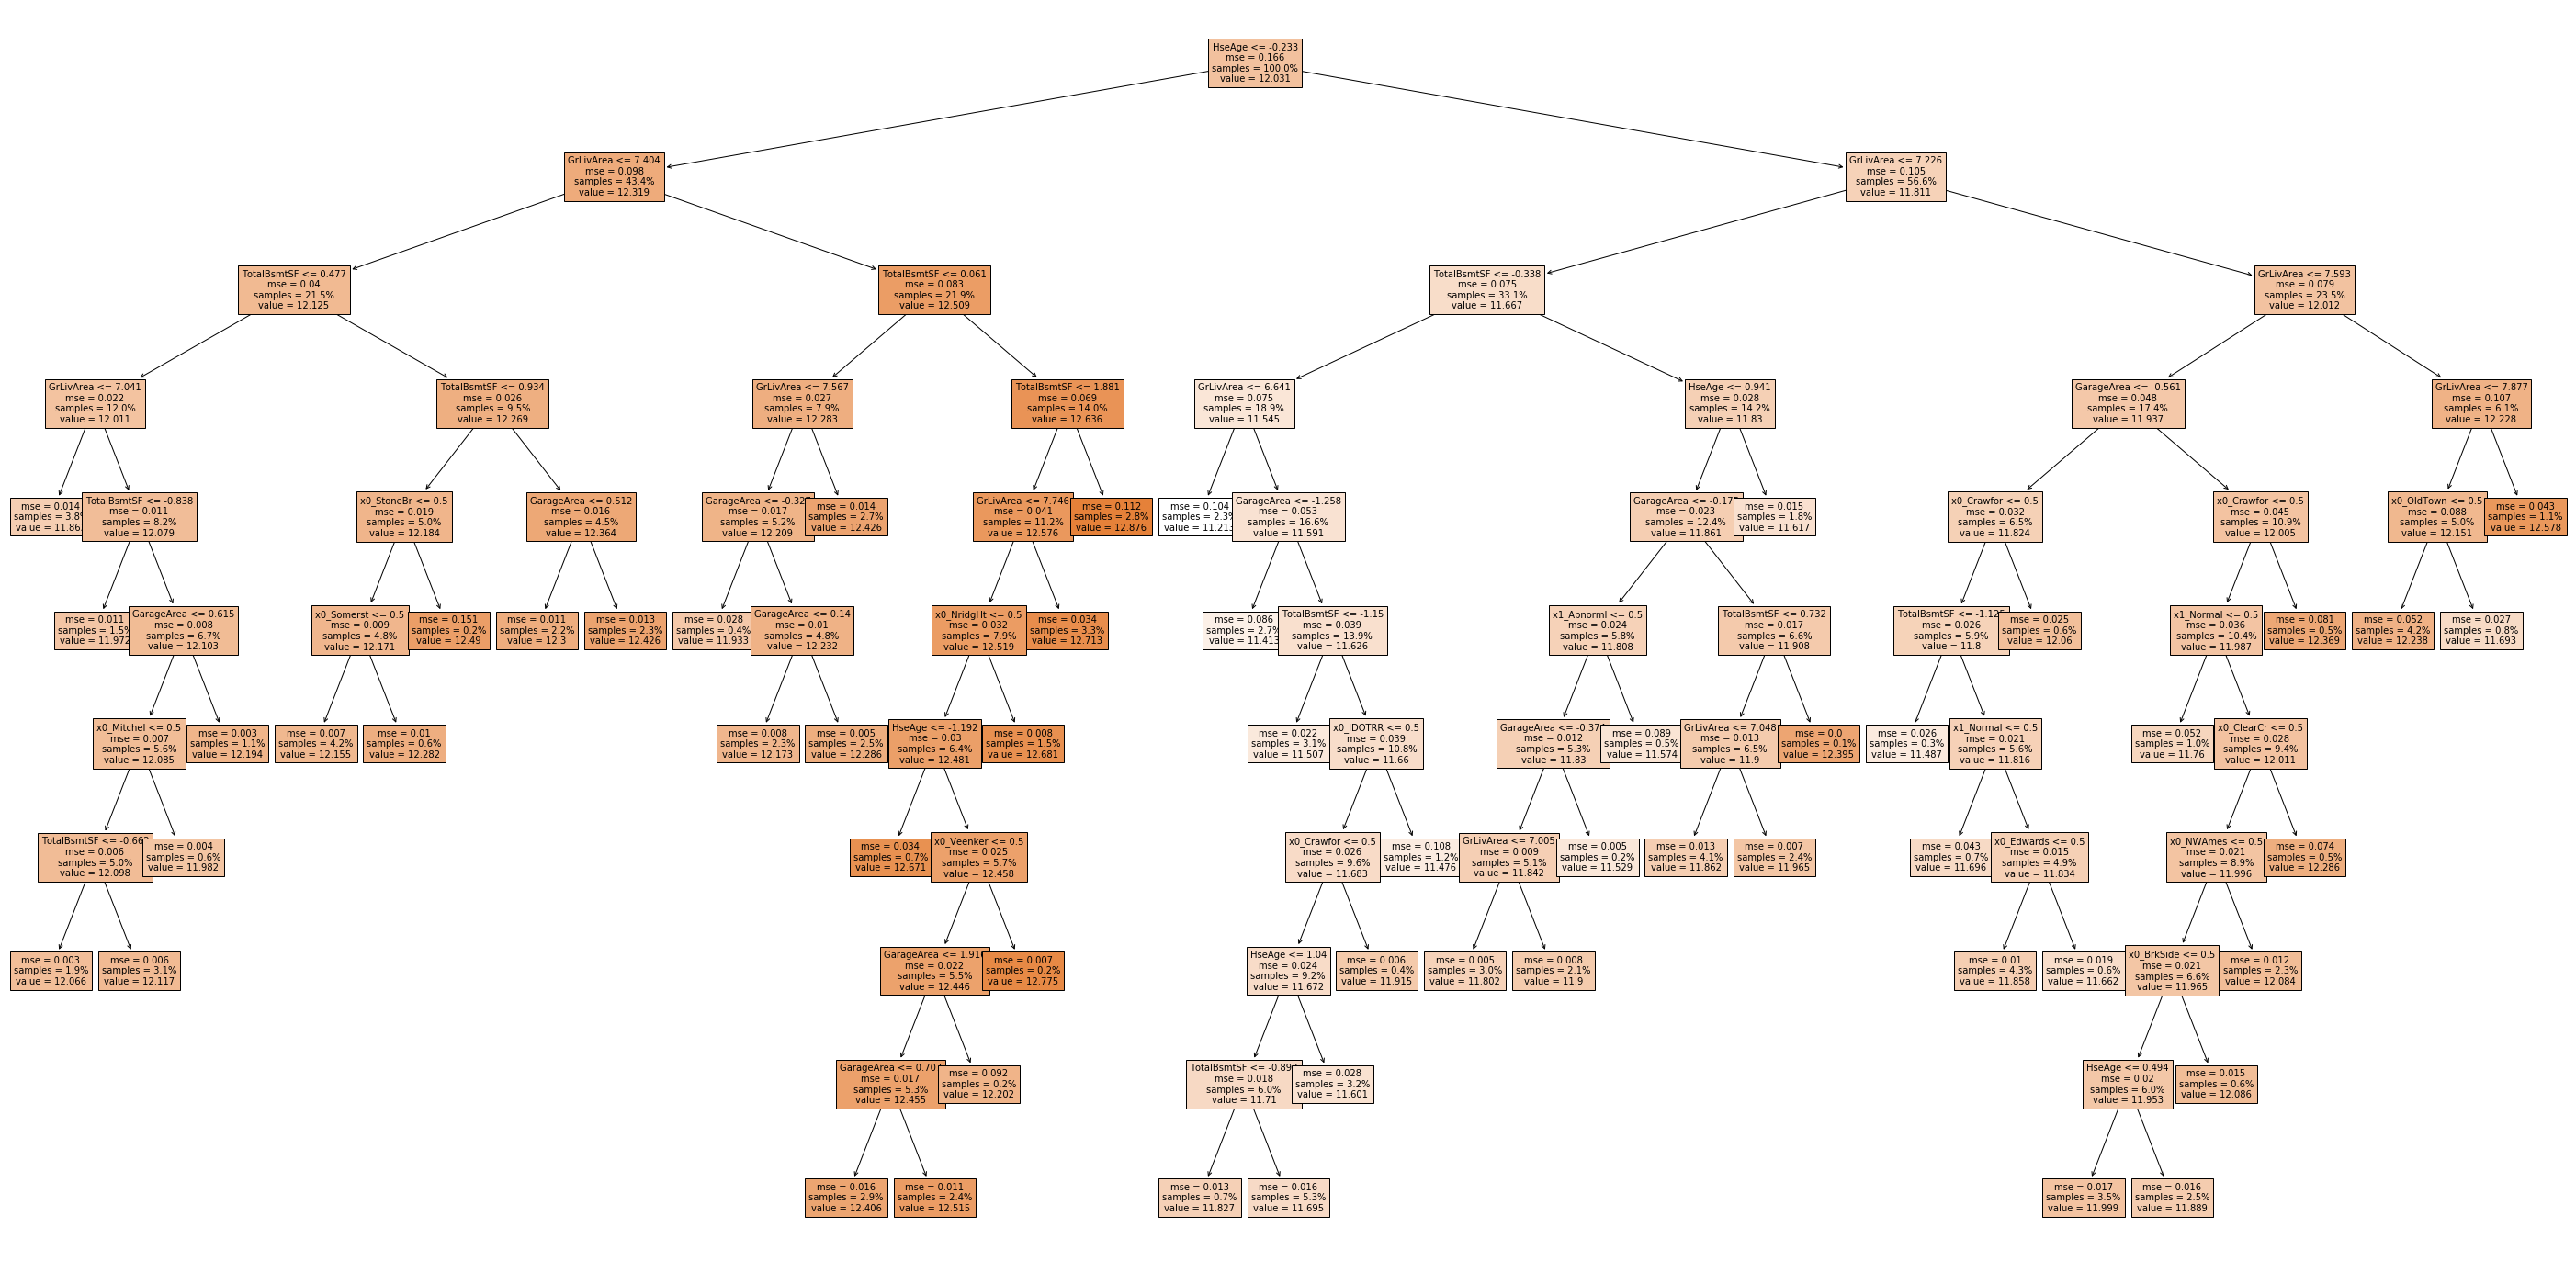

In [32]:
dt = DecisionTreeRegressor(min_samples_split=45, max_depth=10, random_state=0)
dt.fit(train_data, train_labels)
print(f'\n No. of features', dt.n_features_)
print ('\nFeature importances:', dt.feature_importances_)
print ('\nR-square, Training :', dt.score(train_data, train_labels))
print ('R-square, Development:', dt.score(dev_data, dev_labels))
# print ('Accuracy - Test:', dt.score(test_data, test_labels))

print('Mean Squared Error - Training:', mean_squared_error(dt.predict(train_data), train_labels))
print('Mean Squared Error - Development:', mean_squared_error(dt.predict(dev_data), dev_labels))
# print('Mean Squared Error - Test:', mean_squared_error(dt.predict(test_data), test_labels))


# Plot the decision tree for illustration 
fig, ax = plt.subplots(figsize=(50, 25))
tree.plot_tree(dt, fontsize=10, proportion=True, filled=True, feature_names=features.columns)
plt.show()

Our model 2, R square obtained for training and development data set are 0.846 and 0.791 respectively.

## Model 3 - Linear Regression with PCA for Categorical Features 

Instead of using our domain knowledge to select two categorical features 'Neighborhood'and 'SaleCondition' in Model 1, we have included all categorical features in Model 3 and performed PCA for dimension reduction. 

In [33]:
# Create categorical features dataframe

columns_cat = ['MSSubClass', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'PavedDrive', 'MoSold', 'SaleType','SaleCondition', 'OverallQual', 'OverallCond']
raw_data_cat = raw_data[columns_cat]
print(f'\nThe shape of the data set to be used for anlaysis is: {raw_data_cat.shape}')


The shape of the data set to be used for anlaysis is: (1460, 43)


In [34]:
# Convert and transform categorical feastures into numerical 
oh = OneHotEncoder()
raw_data_cat_oh = oh.fit_transform(raw_data_cat).toarray()
raw_data_cat_oh.shape
print(f'\nThe shape of the converted categorical features data set is: {raw_data_cat_oh.shape}')


The shape of the converted categorical features data set is: (1460, 345)


##### Dimensionality Reduction with PCA 

Explained variance ratio for k=1 is 0.12590897475279522: 

Explained variance ratio for k=2 is 0.17925799795615252: 

Explained variance ratio for k=3 is 0.22609758297103733: 

Explained variance ratio for k=4 is 0.25580908100676353: 

Explained variance ratio for k=5 is 0.28423300868539614: 

Explained variance ratio for k=10 is 0.3998135511350412: 

Explained variance ratio for k=20 is 0.5479434039461771: 

Explained variance ratio for k=30 is 0.6476020496367976: 

Explained variance ratio for k=40 is 0.7213563687476663: 

Explained variance ratio for k=50 is 0.7749585111893269: 

Explained variance ratio for k=60 is 0.8180343936906929: 

Explained variance ratio for k=70 is 0.8501217564881944: 

Explained variance ratio for k=80 is 0.8752813155826931: 

Explained variance ratio for k=90 is 0.8963920615411343: 

Explained variance ratio for k=100 is 0.9142499880401237: 

Explained variance ratio for k=110 is 0.9288204214597792: 

Explained variance ratio for k=120 is 0.94072622724877

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

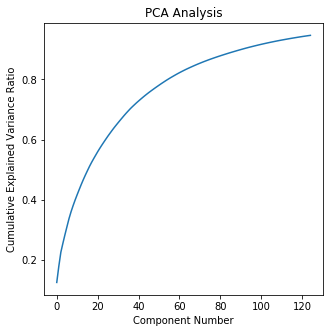

In [35]:
n_comp = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 300]
for k in n_comp: 
    pca_mod = PCA(n_components = k)
    pca_mod.fit(raw_data_cat_oh)
    print ('Explained variance ratio for k={} is {}: \n'.format(k, sum(pca_mod.explained_variance_ratio_))) 

# Create PCA model for evaluation  
pca_mod = PCA(n_components = 125)
pca_mod.fit(raw_data_cat_oh)

# Plot the PCA
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca_mod.explained_variance_ratio_))
plt.title('PCA Analysis')
plt.xlabel('Component Number')
plt.ylabel('Cumulative Explained Variance Ratio')

In [36]:
# Create a new data set with 130 features after reduction so 95% of variance is explained  
pca_mod = PCA(n_components = 130)
pca_train_data = pca_mod.fit_transform(raw_data_cat_oh)
pca_train_data.shape
print(f'\nThe shape of the new data set after reduction is: {pca_train_data.shape}')


The shape of the new data set after reduction is: (1460, 130)


#### Split data set into training, development and testing sets 

In [37]:
X = np.concatenate([pca_train_data, np.array(raw_data_num_combo)], axis=1)
Y = np.array(np.log(raw_data['SalePrice']))

np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1200:], Y[1200:]
dev_data, dev_labels = X[1000:1200], Y[1000:1200]
train_data, train_labels = X[:1000], Y[:1000]

print('train_data shape: ', train_data.shape)
print('dev_data shape:', dev_data.shape)
print('test_data shape:', test_data.shape )

data shape:  (1460, 134)
label shape: (1460,)
train_data shape:  (1000, 134)
dev_data shape: (200, 134)
test_data shape: (260, 134)


##### Model fit and evaluation 

In [38]:
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)
preds = lr_model.predict(train_data)
print("R-square, Training :{:.3f}".format(lr_model.score(train_data, train_labels)))
print("Mean Squared Error, Training:{:.3f}".format(metrics.mean_squared_error(train_labels,preds)))

R-square, Training :0.908
Mean Squared Error, Training:0.015


In [39]:
preds = lr_model.predict(dev_data)
print("R-square, Development: {:.3f}".format(lr_model.score(dev_data, dev_labels)))
print("Mean Squared Error, Development:{:.3f}".format(metrics.mean_squared_error(dev_labels,preds)))

R-square, Development: 0.884
Mean Squared Error, Development:0.019


Our model 3, R - sqaure obtained for training and development data set are 0.908 and 0.884 respectively.

## Model 4 -KNN Regression with PCA for Categorical Features 

Keeping the same dataset as in Model 3, we run KNN to comapre whether we get same, better or worse results. We want to check whether a non-parametric model is any better than linear regression model

In [40]:
X = X = np.concatenate([pca_train_data, np.array(raw_data_num_combo)], axis=1)
Y = np.array(np.log(raw_data['SalePrice']))

np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1200:], Y[1200:]
dev_data, dev_labels = X[1000:1200], Y[1000:1200]
train_data, train_labels = X[:1000], Y[:1000]

print('train_data shape: ', train_data.shape)
print('dev_data shape:', dev_data.shape)
print('test_data shape:', test_data.shape )

data shape:  (1460, 134)
label shape: (1460,)
train_data shape:  (1000, 134)
dev_data shape: (200, 134)
test_data shape: (260, 134)


##### Model fit and evalation 

In [41]:
k_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_neighbors:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(train_data, train_labels)
    print("K={}".format(k))
    preds = neigh.predict(dev_data)
    print("R-square, Training:{:.3f}".format(neigh.score(train_data, train_labels)))
    print("R-square, Development:{:.3f}".format(neigh.score(dev_data, dev_labels)))
    print("Mean Squared Error, Development:{:.3f}\n".format(metrics.mean_squared_error(dev_labels,preds)))

K=1
R-square, Training:1.000
R-square, Development:0.754
Mean Squared Error, Development:0.039

K=2
R-square, Training:0.926
R-square, Development:0.807
Mean Squared Error, Development:0.031

K=3
R-square, Training:0.898
R-square, Development:0.832
Mean Squared Error, Development:0.027

K=4
R-square, Training:0.886
R-square, Development:0.843
Mean Squared Error, Development:0.025

K=5
R-square, Training:0.876
R-square, Development:0.841
Mean Squared Error, Development:0.025

K=6
R-square, Training:0.866
R-square, Development:0.836
Mean Squared Error, Development:0.026

K=7
R-square, Training:0.862
R-square, Development:0.829
Mean Squared Error, Development:0.027

K=8
R-square, Training:0.855
R-square, Development:0.828
Mean Squared Error, Development:0.028

K=9
R-square, Training:0.847
R-square, Development:0.822
Mean Squared Error, Development:0.028

K=10
R-square, Training:0.843
R-square, Development:0.820
Mean Squared Error, Development:0.029



We get best results for K = 4 , R-sqaure, training 0.886 and development of 0.843 which is slightly better than the linear regression and decision tree regression.

## Model 5 - Neural Network

We used the combined feature, numerical ['GarageArea', 'TotalBsmtSF', 'HseAge','GriLivArea'] and categorical ['Neighborhood', 'SaleCondition'] in Model 1 for our Model 5, Neural Network Model.

In [42]:
EPOCHS = 1000

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

def run_model_5(features, sale_prices):
    
    train_dataset, test_dataset, train_labels, test_labels = train_test_split(features, sale_prices, test_size=0.33)
    
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(train_dataset)
    scaled_test_data = scaler.transform(test_dataset)
    
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    
    history = model.fit(scaled_train_data, train_labels, epochs=EPOCHS,
                        validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])
    
    loss, mae, mse = model.evaluate(scaled_test_data, test_labels, verbose=0)
    
    print()
    print(f'Testing Mean Abs Error: {mae}')
    
    test_predictions = model.predict(scaled_test_data).flatten()
    train_predictions = model.predict(scaled_train_data).flatten()
    
    mse = mean_squared_error(test_labels, test_predictions)
    print(f'Mean Squared Error: {mse}',)
    
    mae = mean_absolute_error(test_labels, test_predictions)
    print(f'Mean Absolute Error: {mae}')
    
    rsq = r2_score(train_labels, train_predictions)
    print(f'R-square, Training: {rsq}')
    
    rsq = r2_score(test_labels, test_predictions)
    print(f'R-square, Testing: {rsq}')    
    
    return model, history, train_labels, train_predictions, test_labels, test_predictions
   

# target feature
sale_prices = raw_data[['SalePrice']]
# 'features' is the dataset combined numerical and categrical features for model 1 above.
model, history_5, train_labels_5, train_labels_5, test_labels_5, test_predictions_5 = run_model_5(features, sale_prices)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.......
Testing Mean Abs Error: 23204.029296875
Mean Squared Error: 1309980637.958215
Mean Absolute Error: 23204.028899766596
R-square, Training: 0.8281858110891729
R-square, Testing: 0.8168962909712856


### Mean Abs Error for each epoch

Notice the error drops sharply around Epoch #100.  

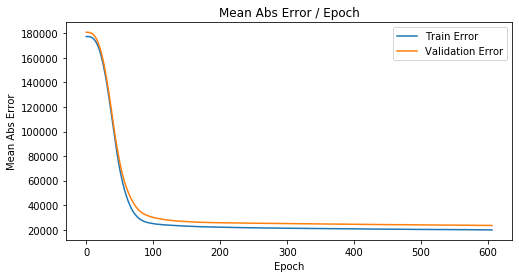

In [43]:
hist = pd.DataFrame(history_5.history)
hist['epoch'] = history_5.epoch

plt.figure(figsize=(8,4))
plt.title('Mean Abs Error / Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')

if 'mean_absolute_error' in hist:
    mae_by_epoch = hist['mean_absolute_error']
    validation_mae_by_epoch = hist['val_mean_absolute_error']
else:
    mae_by_epoch = hist['mae']
    validation_mae_by_epoch = hist['val_mae']    

plt.plot(hist['epoch'], mae_by_epoch, label='Train Error')
plt.plot(hist['epoch'], validation_mae_by_epoch, label = 'Validation Error')
plt.legend()

### Visualizing Model Accuracy

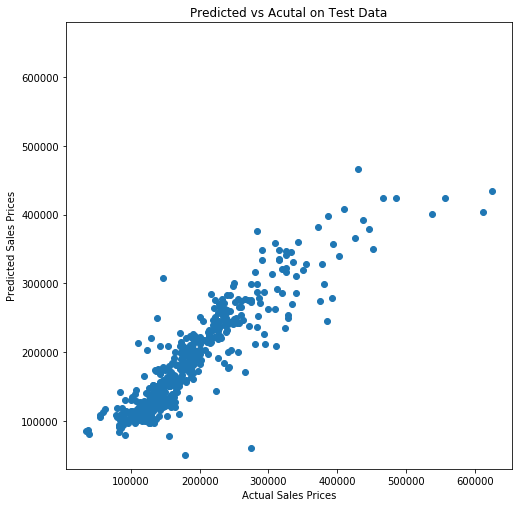

In [44]:
plt.figure(figsize=(8,10))
plt.scatter(test_labels_5, test_predictions_5)
plt.title('Predicted vs Acutal on Test Data')
plt.xlabel('Actual Sales Prices')
plt.ylabel('Predicted Sales Prices')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100])
plt.show()

### Visualizing Model Error

As you can see in the graph below, the model's error is approximately normal.  

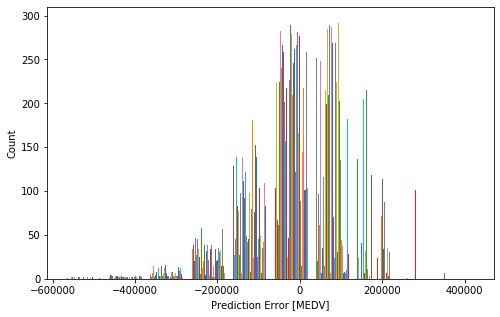

In [45]:
plt.figure(figsize=(8,5))
error = test_predictions_5 - test_labels_5.values
plt.hist(error)
plt.xlabel("Prediction Error [MEDV]")
plt.ylabel("Count")
plt.show()

# Conlusion 

Initially, we performed baseline modeling with one feature selected from the dataset. Feature selected for model is GrLivArea as well as  LotArea where R-sqaure, Training dataset obtained are 0.479 and 0.17 respectively.

We then continued the improvemet with the approach stated above with different modelings, linear regression (with and without regularization), decision tree, linear regression with PCA , KNN with PCA and finally neural network.

Following is summaried the R-square of each model that we obtained. All our improved models achieved better R-sqaure,  training than baseline model, that is at least 70% improvement. 

Among our improved models, Model 3, Linear Regression with PCA R-square obtained with the largest R-Square score for training  (0.909) and development (0.886) dataset.

|                       | Baseline Model | Model 1a  Linear Regression  | Model 1b  Linear Regression Lasso | Model 1b Linear Regression  Ridge | Model 2 DecissionTree Regression  | Model 3 Linear Regression  with PCA | Model 4 KNN Regression (k =4)  with PCA | Model 5  Neural Network |
|-----------------------|:--------------:|:----------------------------:|:---------------------------------:|:---------------------------------:|:---------------------------------:|:-----------------------------------:|:---------------------------------------:|:-----------------------:|
| R2 Score, Training    |      0.479     |             0.826            |               0.826               |               0.826               |               0.846               |                0.909                |                    0.886                    |          0.831          |
| R2 Score, Development |        -       |             0.817            |               0.818               |               0.819               |               0.791               |                0.886                |                  0.844                  |          0.822          |

We then used 'Test' dataset with Model 3 for prediction below and obtained the R-sqaure value of 0.905.  

In [46]:
# Model 3 with train and test data set
print('train_data shape: ', train_data.shape)
print('test_data shape:', test_data.shape )

lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)
preds = lr_model.predict(test_data)
print("\nR-square, Test :{:.3f}".format(lr_model.score(test_data, test_labels)))
print("Mean Squared Error, Test:{:.3f}".format(metrics.mean_squared_error(test_labels,preds)))

train_data shape:  (1000, 134)
test_data shape: (260, 134)

R-square, Test :0.905
Mean Squared Error, Test:0.013
